<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import numpy as np

In [0]:
valid_size=0.2
num_workers=0

transform = transforms.ToTensor()
train_set = datasets.MNIST(root='data', download=True, train=True, transform=transform)
test_set =  datasets.MNIST(root='data', download=True, train=False, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_set)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=20, sampler=train_sampler, num_workers=num_workers)
testloader = torch.utils.data.DataLoader(test_set, batch_size=20, shuffle=True, num_workers=num_workers)
validloader = torch.utils.data.DataLoader(train_set, batch_size=20, sampler=valid_sampler, num_workers=num_workers)

#Visualize data

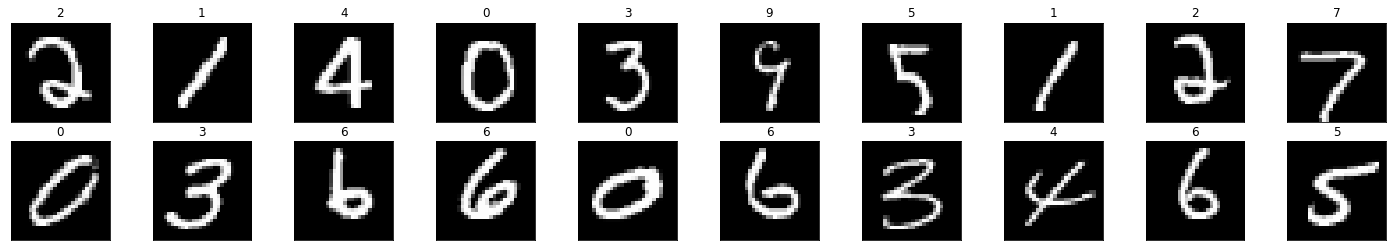

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

images, labels = next(iter(trainloader))
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [4]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    hidden_1 = 512
    hidden_2 = 512
    self.fc1 = nn.Linear(784, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, 10)
    self.dropout = nn.Dropout(0.2)
  def forward(self, x):
    x = x.view(-1, 784)
    x = nn.ReLU(self.fc1(x))
    x = self.dropout(x)
    x = nn.ReLU(self.fc2(x))
    x = self.dropout(x)
    x =self.fc3(x)
    return x

model = Net()
model   

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [0]:
criterion = nn.CrossEntropyLoss(x)
optimizer = torch.optim.SGd(model.parameters(), lr=0.01)

In [0]:
epochs = 50
